In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler  
from sklearn.metrics import classification_report  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/ACER/Desktop/Customer-Churn-Records.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD


In [4]:
df.drop(columns = ["RowNumber","CustomerId","Surname"], inplace = True)

In [5]:
# Loại bỏ các giá trị ngoại lai bằng IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'CreditScore')


In [6]:
df.CreditScore.unique()

array([619, 608, 502, 699, 850, 645, 822, 501, 684, 528, 497, 476, 549,
       635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756, 571,
       574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472, 465,
       556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601, 656,
       725, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675, 738, 813,
       657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506, 493, 750,
       729, 646, 647, 808, 524, 769, 730, 515, 773, 814, 710, 413, 623,
       622, 785, 605, 479, 685, 538, 562, 721, 628, 668, 828, 674, 625,
       432, 770, 758, 795, 686, 789, 589, 461, 584, 579, 663, 682, 793,
       691, 485, 650, 754, 535, 716, 539, 706, 586, 631, 717, 800, 683,
       704, 615, 667, 484, 480, 578, 512, 606, 597, 778, 514, 525, 715,
       580, 807, 521, 759, 516, 711, 618, 643, 671, 689, 620, 676, 572,
       695, 592, 567, 670, 694, 547, 594, 610, 767, 763, 712, 703, 662,
       523, 772, 545, 634, 739, 771, 544, 696, 766, 727, 693, 55

In [7]:
df['CreditScore'] = pd.cut (df['CreditScore'], bins = [300, 500, 600, 700, 800, 900],
labels = ['Rat thap','Thap','Trung binh','Cao', 'Rat cao'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type
0,Trung binh,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND
1,Trung binh,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND
2,Thap,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND
3,Trung binh,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD
4,Rat cao,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD


In [8]:
df.Age.unique()

array([42, 41, 39, 43, 44, 50, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38, 46,
       36, 29, 33, 40, 51, 61, 49, 37, 19, 56, 26, 21, 55, 22, 30, 28, 48,
       52, 57, 47, 54, 20, 62, 53, 59, 23, 60, 18], dtype=int64)

In [9]:
df['Age'] = pd.cut (df['Age'], bins = [18, 30, 40, 60, 100],
labels = ['18-29', '30-39', '40-59', '>60'])
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type
0,Trung binh,France,Female,40-59,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND
1,Trung binh,Spain,Female,40-59,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND
2,Thap,France,Female,40-59,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND
3,Trung binh,France,Female,30-39,1,0.00,2,0,0,93826.63,0,0,5,GOLD
4,Rat cao,Spain,Female,40-59,2,125510.82,1,1,1,79084.10,0,0,5,GOLD


In [10]:
df.Balance.unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79])

In [11]:
bins = [-float('inf'), 10000, 49999, 99999, 149999, float('inf')]
labels = ['Rat thap', 'Thap', 'Trung binh', 'Cao', 'Rat cao']

# Sử dụng pd.cut để phân loại và thay thế trực tiếp vào cột Balance
df['Balance'] = pd.cut(df['Balance'], bins=bins, labels=labels)

In [12]:
df.EstimatedSalary.unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [13]:
bins = [-float('inf'), 40000, 70000, 90000, 110000, float('inf')]
labels = ['Rat thap', 'Thap', 'Trung binh', 'Cao', 'Rat cao']
df['EstimatedSalary'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels)

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["CreditScore"] = lb_make.fit_transform(df["CreditScore"])
df["Geography"] = lb_make.fit_transform(df["Geography"])
df["Gender"] = lb_make.fit_transform(df["Gender"])
df["Age"] = lb_make.fit_transform(df["Age"])
df["Balance"] = lb_make.fit_transform(df["Balance"])
df["EstimatedSalary"] = lb_make.fit_transform(df["EstimatedSalary"])
df["Card Type"] = lb_make.fit_transform(df["Card Type"])


In [15]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type
0,4,0,0,2,2,2,1,1,1,0,1,1,2,0
1,4,2,0,2,1,4,1,0,1,1,0,1,3,0
2,3,0,0,2,8,1,3,1,0,1,1,1,3,0
3,4,0,0,1,1,2,2,0,0,0,0,0,5,1
4,1,2,0,2,2,0,1,1,1,4,0,0,5,1
5,4,2,1,2,8,0,2,1,0,1,1,1,5,0
6,1,0,1,2,7,2,2,1,1,2,0,0,2,3
8,3,0,1,2,4,0,2,0,1,4,0,0,3,1
9,4,0,1,0,2,0,1,1,1,4,0,0,3,1
10,3,0,1,1,6,0,2,0,0,4,0,0,3,1


In [16]:
import pandas as pd

# Tạo một từ điển ánh xạ giữa giá trị mã hóa và giá trị tương ứng 
mapping = {0: 'ở lại', 1: 'rời bỏ'}

# Áp dụng ánh xạ để giải mã cột 'Exited' 
df['Exited_Decoded'] = df['Exited'].map(mapping)

# Hiển thị DataFrame với cột 'Exited' đã được giải mã print(df)

df = df.drop(columns=['Exited'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Exited_Decoded
0,4,0,0,2,2,2,1,1,1,0,1,2,0,rời bỏ
1,4,2,0,2,1,4,1,0,1,1,1,3,0,ở lại
2,3,0,0,2,8,1,3,1,0,1,1,3,0,rời bỏ
3,4,0,0,1,1,2,2,0,0,0,0,5,1,ở lại
4,1,2,0,2,2,0,1,1,1,4,0,5,1,ở lại
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,5,2,2,1,0,0,0,1,0,ở lại
9996,3,0,1,1,10,4,1,1,1,0,0,5,2,ở lại
9997,0,0,0,1,7,2,1,0,1,3,1,3,3,rời bỏ
9998,0,1,1,2,3,4,2,1,0,0,1,2,1,rời bỏ


In [17]:
#Xác định thuộc tính mô tả và thuộc tính dự đoán
feature = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Satisfaction Score','Card Type']
target = ['Exited_Decoded']
X =df[feature]
y=df[target]
print(X)
print(y)
from sklearn.model_selection import train_test_split
#Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train)
print(y_train)
print(X_test)
print(y_test)


      CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0               4          0       0    2       2        2              1   
1               4          2       0    2       1        4              1   
2               3          0       0    2       8        1              3   
3               4          0       0    1       1        2              2   
4               1          2       0    2       2        0              1   
...           ...        ...     ...  ...     ...      ...            ...   
9995            0          0       1    1       5        2              2   
9996            3          0       1    1      10        4              1   
9997            0          0       0    1       7        2              1   
9998            0          1       1    2       3        4              2   
9999            0          0       0    0       4        0              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
0  

In [18]:
#In ra kích thước tập huấn luyện và kiểm tra
print("Testing set size:", len(X_test))
print("Traning set size:", len(X_train))

Testing set size: 1926
Traning set size: 7701


In [19]:
#Khai báo mô hình cây quyết định
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion = "gini",
                                  random_state = 40,
                                  max_depth= 3,
                                  min_samples_leaf = 10)


In [20]:
#Thực thi mô hình
model = model.fit(X_train, y_train)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus


[Text(0.5, 0.875, 'x[3] <= 1.5\ngini = 0.325\nsamples = 7701\nvalue = [1571, 6130]'),
 Text(0.25, 0.625, 'x[6] <= 2.5\ngini = 0.192\nsamples = 5135\nvalue = [553, 4582]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 1.5\ngini = 0.172\nsamples = 5030\nvalue = [477, 4553]'),
 Text(0.0625, 0.125, 'gini = 0.259\nsamples = 2464\nvalue = [377, 2087]'),
 Text(0.1875, 0.125, 'gini = 0.075\nsamples = 2566\nvalue = [100, 2466]'),
 Text(0.375, 0.375, 'x[5] <= 1.5\ngini = 0.4\nsamples = 105\nvalue = [76.0, 29.0]'),
 Text(0.3125, 0.125, 'gini = 0.198\nsamples = 54\nvalue = [48, 6]'),
 Text(0.4375, 0.125, 'gini = 0.495\nsamples = 51\nvalue = [28.0, 23.0]'),
 Text(0.75, 0.625, 'x[6] <= 2.5\ngini = 0.479\nsamples = 2566\nvalue = [1018.0, 1548.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= 1.5\ngini = 0.462\nsamples = 2418\nvalue = [876, 1542]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 1437\nvalue = [719, 718]'),
 Text(0.6875, 0.125, 'gini = 0.269\nsamples = 981\nv

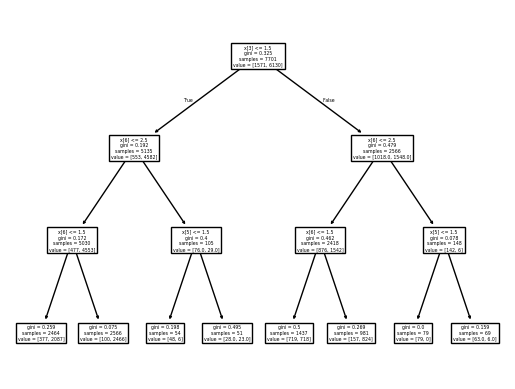

In [22]:
#Kết quả cây phân lớp
tree.plot_tree(model)

In [23]:
print(tree.export_text(model,show_weights=True))

|--- feature_3 <= 1.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- weights: [377.00, 2087.00] class: ở lại
|   |   |--- feature_6 >  1.50
|   |   |   |--- weights: [100.00, 2466.00] class: ở lại
|   |--- feature_6 >  2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- weights: [48.00, 6.00] class: rời bỏ
|   |   |--- feature_5 >  1.50
|   |   |   |--- weights: [28.00, 23.00] class: rời bỏ
|--- feature_3 >  1.50
|   |--- feature_6 <= 2.50
|   |   |--- feature_6 <= 1.50
|   |   |   |--- weights: [719.00, 718.00] class: rời bỏ
|   |   |--- feature_6 >  1.50
|   |   |   |--- weights: [157.00, 824.00] class: ở lại
|   |--- feature_6 >  2.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- weights: [79.00, 0.00] class: rời bỏ
|   |   |--- feature_5 >  1.50
|   |   |   |--- weights: [63.00, 6.00] class: rời bỏ



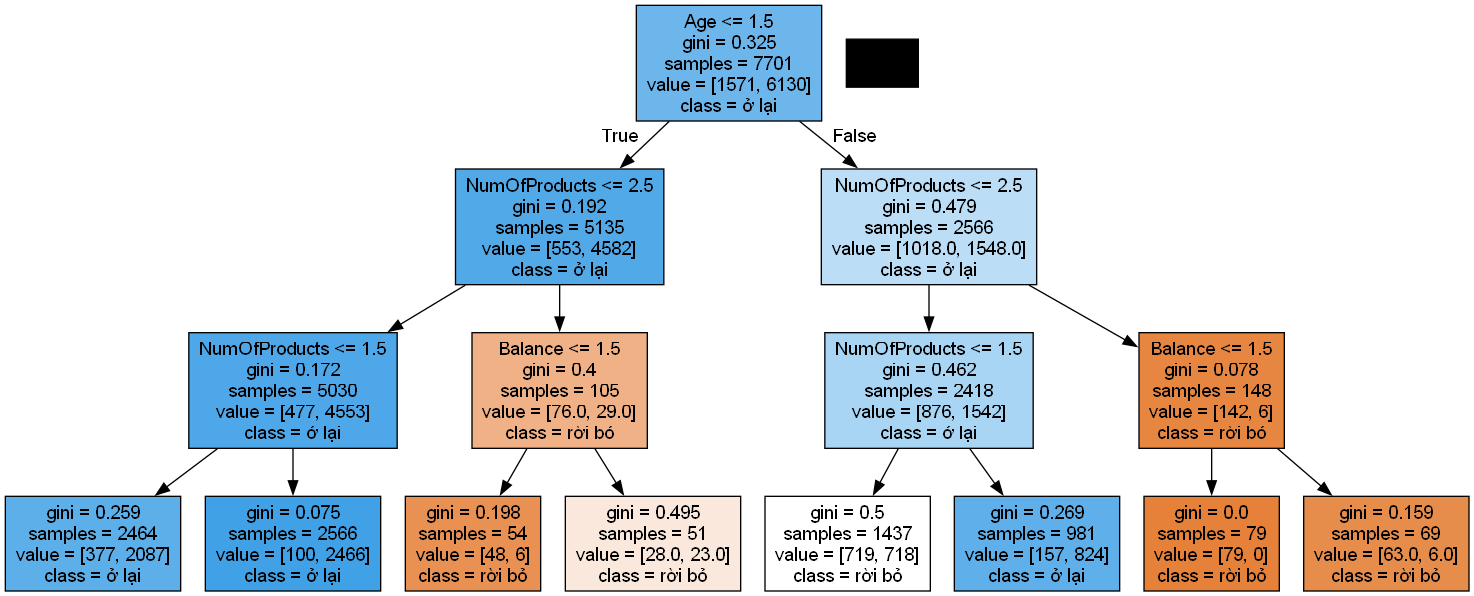

In [24]:
feature=['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Satisfaction Score','Card Type'] #Nhận tính năng chỉ báo
target=df['Exited_Decoded'].unique() # Nhận giá trị mục tiêu
#Tạo dữ liệu DOT
dot_df = tree.export_graphviz(model, out_file = None,
                                feature_names = feature,
                                class_names = target,filled=True,)
graph = pydotplus.graph_from_dot_data(dot_df)

# Hiển thị đồ thị của cây quyết định 
Image(graph.create_png())

In [25]:
#Kiểm thử mô hình
y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n", y_pred)

Giá trị nhãn mô hình dự đoán được:
 ['ở lại' 'ở lại' 'ở lại' ... 'ở lại' 'ở lại' 'ở lại']


In [26]:
predictions = model.predict(X_test)
print("Accuracy",accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy 0.8104880581516095
              precision    recall  f1-score   support

      rời bỏ       0.52      0.58      0.55       380
       ở lại       0.89      0.87      0.88      1546

    accuracy                           0.81      1926
   macro avg       0.71      0.72      0.71      1926
weighted avg       0.82      0.81      0.81      1926



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình cây quyết định
tree_model = DecisionTreeClassifier(random_state=42)

# Thiết lập lưới siêu tham số để tìm kiếm
param_grid = {
    'max_depth': [3, 5, 7, 10],            # Độ sâu của cây
    'min_samples_split': [2, 5, 10],       # Số lượng mẫu tối thiểu để chia nhánh
    'min_samples_leaf': [1, 2, 4],         # Số lượng mẫu tối thiểu trong mỗi lá
    'criterion': ['gini', 'entropy']       # Tiêu chuẩn chia (gini hoặc entropy)
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=param_grid, 
                           cv=5,                # Số lần chia dữ liệu (cross-validation)
                           scoring='accuracy',  # Tiêu chí đánh giá
                           verbose=1, 
                           n_jobs=-1)

# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

# Lấy siêu tham số tốt nhất
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Dự đoán và đánh giá mô hình với các siêu tham số tốt nhất
best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test)

# In kết quả đánh giá
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

      rời bỏ       0.67      0.42      0.52       380
       ở lại       0.87      0.95      0.91      1546

    accuracy                           0.85      1926
   macro avg       0.77      0.69      0.71      1926
weighted avg       0.83      0.85      0.83      1926



In [28]:
from sklearn.model_selection import GridSearchCV

# Khai báo model
model = tree.DecisionTreeClassifier(random_state=40)

# Các tham số cần thử nghiệm
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters: ", grid_search.best_params_)
# Dự đoán với mô hình tốt nhất
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

Classification Report:
              precision    recall  f1-score   support

      rời bỏ       0.67      0.43      0.52       380
       ở lại       0.87      0.95      0.91      1546

    accuracy                           0.85      1926
   macro avg       0.77      0.69      0.71      1926
weighted avg       0.83      0.85      0.83      1926



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Huấn luyện mô hình cây quyết định trên dữ liệu đã được cân bằng
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Độ chính xác: {accuracy:.2f}")
print("Báo cáo phân loại:\n", report)


Độ chính xác: 0.74
Báo cáo phân loại:
               precision    recall  f1-score   support

      rời bỏ       0.41      0.54      0.47       412
       ở lại       0.86      0.79      0.82      1514

    accuracy                           0.74      1926
   macro avg       0.64      0.66      0.65      1926
weighted avg       0.77      0.74      0.75      1926



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Khởi tạo mô hình cây quyết định
tree_model = DecisionTreeClassifier(random_state=42)
# Thiết lập lưới siêu tham số để tìm kiếm
param_grid = {
    'max_depth': [3, 5, 7, 10],            # Độ sâu của cây
    'min_samples_split': [2, 5, 10],       # Số lượng mẫu tối thiểu để chia nhánh
    'min_samples_leaf': [1, 2, 4],         # Số lượng mẫu tối thiểu trong mỗi lá
    'criterion': ['gini', 'entropy']       # Tiêu chuẩn chia (gini hoặc entropy)
}
# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, 
                           param_grid=param_grid, 
                           cv=5,                # Số lần chia dữ liệu (cross-validation)
                           scoring='accuracy',  # Tiêu chí đánh giá
                           verbose=1, 
                           n_jobs=-1)
# Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)
# Lấy siêu tham số tốt nhất
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
# Dự đoán và đánh giá mô hình với các siêu tham số tốt nhất
best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test)
# In kết quả đánh giá
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

      rời bỏ       0.69      0.42      0.52       412
       ở lại       0.86      0.95      0.90      1514

    accuracy                           0.84      1926
   macro avg       0.77      0.68      0.71      1926
weighted avg       0.82      0.84      0.82      1926



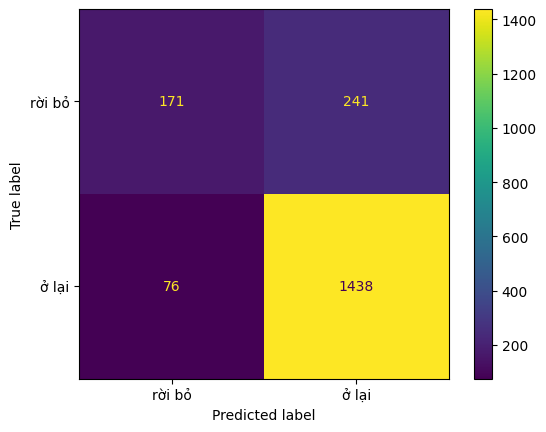

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hiển thị ma trận nhầm lẫn
ConfusionMatrixDisplay.from_estimator(best_tree_model, X_test, y_test)